In [50]:
import sys
from pathlib import Path
from stardist.models import StarDist2D
# Import the package from the src directory

cwd_path = Path.cwd()
root_path = cwd_path.parent



package_path = root_path / "src"

sys.path.append(str(package_path))

from PIL import PngImagePlugin
import CapybaraHD.train.stardist_model as cp_model

# Set large read permission for png files
LARGE_ENOUGH_NUMBER = 100
PngImagePlugin.MAX_TEXT_CHUNK = LARGE_ENOUGH_NUMBER * (1024**2)



In [51]:
# Train model data
training_data_path =  root_path / "models" / "test_model"

all_annotations_folder = training_data_path / "FL3_annotation"
all_annotations_files = list(all_annotations_folder.glob('*.geojson'))

image_folder = training_data_path / "FL3_image"

/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/models/test_model/FL3_annotation/fl_t21_3_tile_10240_7680.geojson


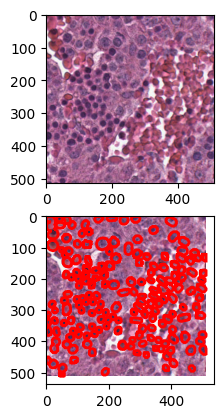

/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/models/test_model/FL3_annotation/fl4_normal_tile_10752_23040.geojson


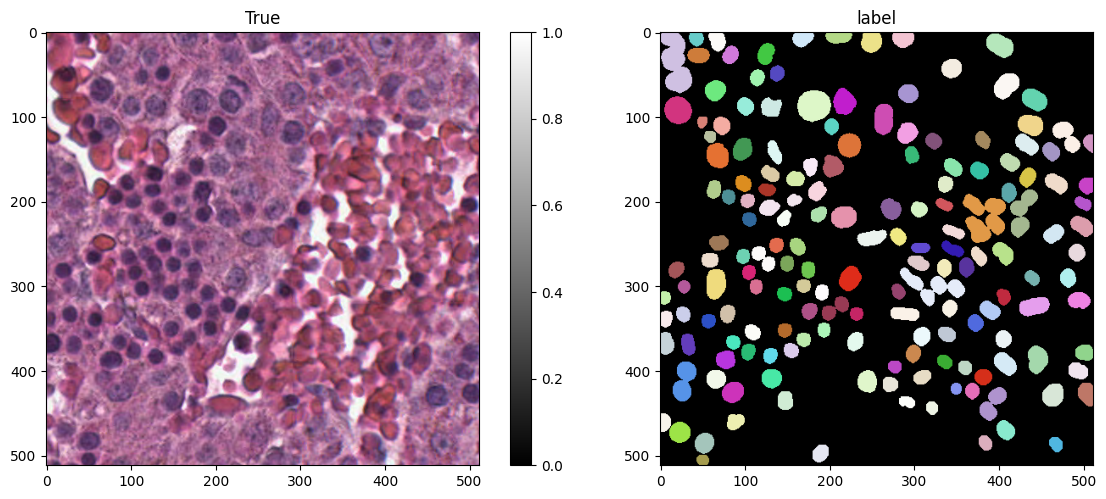

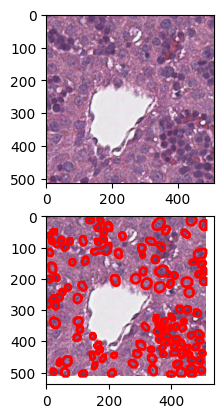

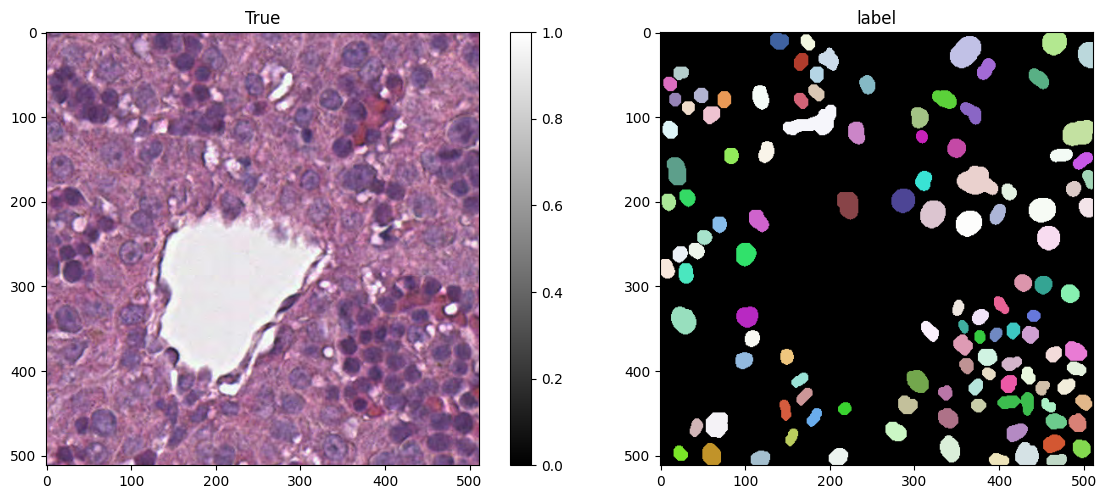

In [52]:
all_images = []
all_masks = []

for annotation_f in all_annotations_files[:2]:
    print(annotation_f)
    image_f = image_folder / (annotation_f.stem + '.png')
    if not image_f.exists():
        print(f'Skipping {annotation_f.stem}.png')
        continue
    # Load the image
    image_array, mask_matrix = cp_model.generate_img_array_mask(
        image_f,
        annotation_f,
        show_labels=True
    )
    all_images.append(image_array)
    all_masks.append(mask_matrix)
    # break

n_channel = cp_model.check_channel(all_images)

In [6]:
all_images_fls = all_images.copy()
all_masks_fls = all_masks.copy()

In [7]:
X_trn, Y_trn, X_val, Y_val, X, Y = cp_model.generate_train(all_images_fls, all_masks_fls, )

100%|██████████| 2/2 [00:00<00:00, 146.35it/s]

number of images:   2
- training:         1
- validation:       1


persistent_dict.py (63): Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.


If you want to compute separable approximations, please install it with
pip install scikit-tensor-py3


base_model.py (203): output path for model already exists, files may be overwritten: /Users/boyangzhang/Documents/ng_lab/visium_all_tangram_geneset_ligand_cci/pythonProject/out_elvin/CapybaraHD/pythonProject/models/stardist
functional.py (238): The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(1, 256, 256, 3))


Config2D(n_dim=2, axes='YXC', n_channel_in=3, n_channel_out=33, train_checkpoint='weights_best.h5', train_checkpoint_last='weights_last.h5', train_checkpoint_epoch='weights_now.h5', n_rays=32, grid=(2, 2), backbone='unet', n_classes=None, unet_n_depth=3, unet_kernel_size=(3, 3), unet_n_filter_base=32, unet_n_conv_per_depth=2, unet_pool=(2, 2), unet_activation='relu', unet_last_activation='relu', unet_batch_norm=False, unet_dropout=0.0, unet_prefix='', net_conv_after_unet=128, net_input_shape=(None, None, 3), net_mask_shape=(None, None, 1), train_shape_completion=False, train_completion_crop=32, train_patch_size=(256, 256), train_background_reg=0.0001, train_foreground_only=0.9, train_sample_cache=True, train_dist_loss='mae', train_loss_weights=(1, 0.2), train_class_weights=(1, 1), train_epochs=400, train_steps_per_epoch=100, train_learning_rate=0.0003, train_batch_size=4, train_n_val_patches=None, train_tensorboard=True, train_reduce_lr={'factor': 0.5, 'patience': 40, 'min_delta': 0}, 

NOTE: This is only for a quick demonstration!
      Please set the variable 'quick_demo = False' for proper (long) training.


median object size:      [18. 18.]
network field of view :  [94 94]
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 404ms/step - dist_dist_iou_metric: 0.0517 - dist_loss: 7.7330 - dist_relevant_mae: 7.7329 - dist_relevant_mse: 88.8309 - loss: 1.9725 - prob_kld: 0.3577 - prob_loss: 0.4259 - val_dist_dist_iou_metric: 0.2492 - val_dist_loss: 4.5816 - val_dist_relevant_mae: 4.5811 - val_dist_relevant_mse: 35.6094 - val_loss: 1.2253 - val_prob_kld: 0.1892 - val_prob_loss: 0.3089 - learning_rate: 3.0000e-04
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 339ms/step - dist_dist_iou_metric: 0.3087 - dist_loss: 4.6872 - dist_relevant_mae: 4.6865 - dist_relevant_mse: 38.4625 - loss: 1.1753 - prob_kld: 0.1705 - prob_loss: 0.2379 - val_dist_dist_iou_metric: 0.3517 - val_dist_loss: 4.0131 - val_dist_relevant_mae: 4.0125 - val_dist_relevant_mse: 27.2098 - val_loss: 1.1153 - val_prob_kld: 0.1930 - val_prob_loss: 0.3127 - learning_rate: 3.0000e-04
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 314ms/step - dist_dist_i

====> Stopping training and loading previously trained demo model from disk.



Loading network weights from 'weights_best.h5'.


functional.py (238): The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(1, 512, 512, 3))
NMS threshold = 0.5:  75%|███████▌  | 15/20 [00:00<00:00, 33.92it/s, 0.697 -> 0.505]


Using optimized values: prob_thresh=0.69725, nms_thresh=0.3.
Saving to 'thresholds.json'.
Saving model to test_model


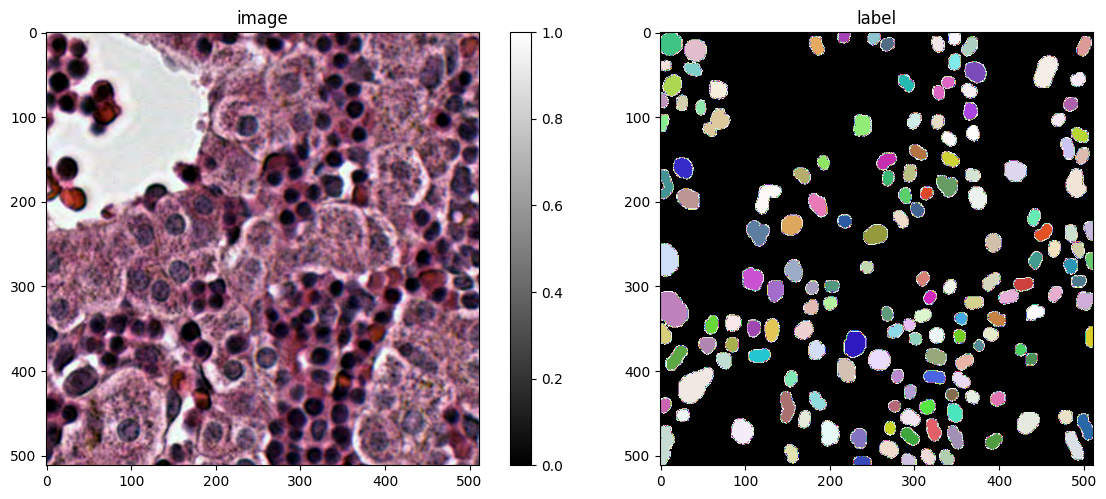

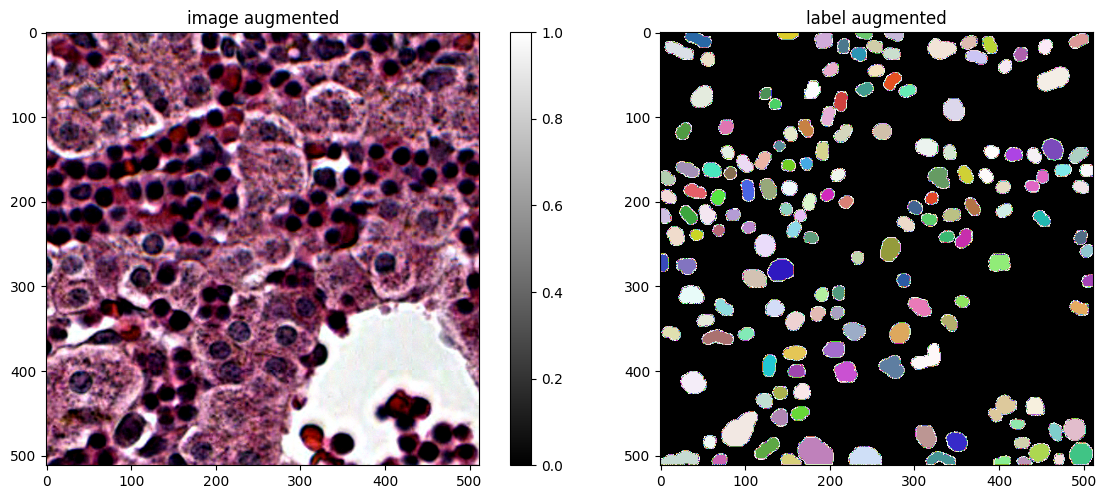

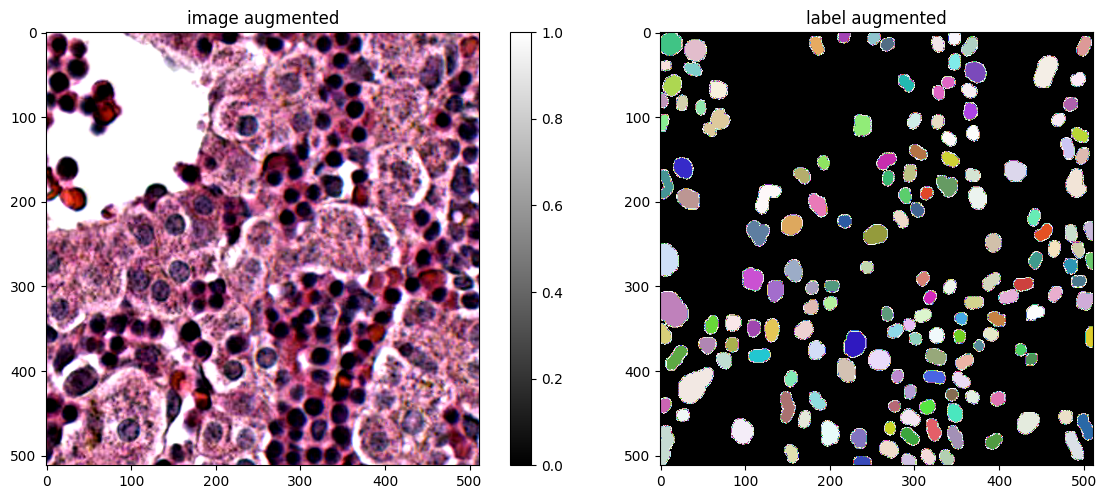

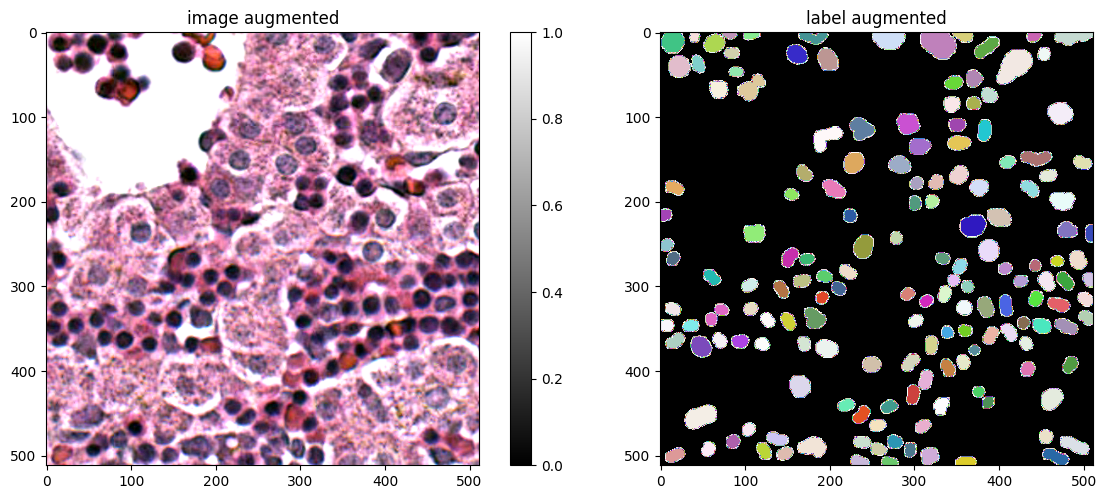

In [9]:
model = cp_model.train_stardist(X_trn, Y_trn, X_val, Y_val, X, Y, n_channel,saving_model_folder,
                                agumenter_demo=True, quick_demo=True, )

In [53]:
# Reload full trained model

full_model_dir = root_path / "models"/'fl_image_model'

model = StarDist2D(None, full_model_dir.name, basedir=full_model_dir.parent)

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.53256, nms_thresh=0.3.


In [54]:
# Make new predictions for large tiles
all_new_images_folder = training_data_path / "FL3_predict"
all_new_images = sorted(all_new_images_folder.glob('*.png'))


saving_model_folder = training_data_path / "saving_model_predictions"

save_coords_folder = saving_model_folder / 'nucleus_predictions'
save_coords_folder.mkdir(parents=True, exist_ok=True)

save_debug_image_folder = saving_model_folder / 'nucleus_predictions_debug'
save_debug_image_folder.mkdir(parents=True, exist_ok=True)




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13809524..1.0088495].


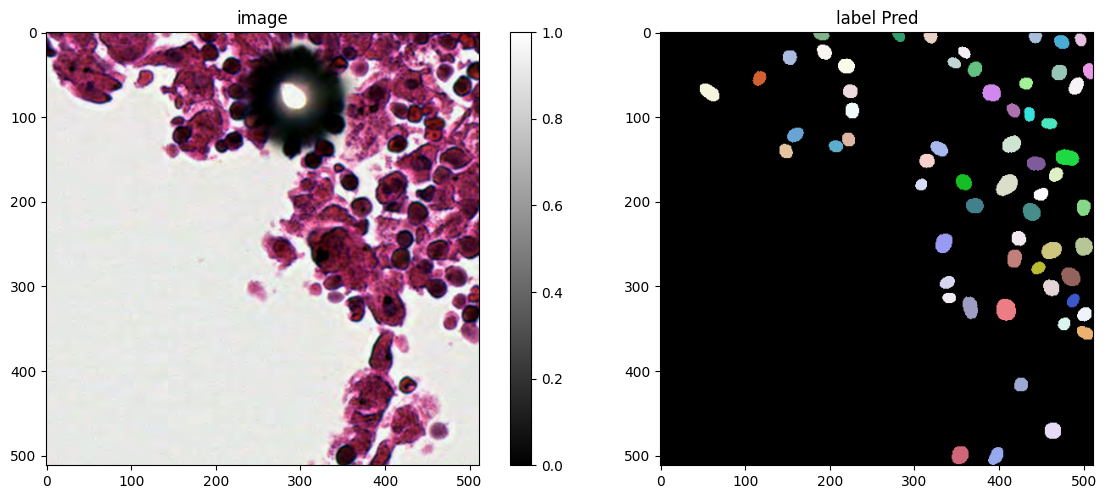

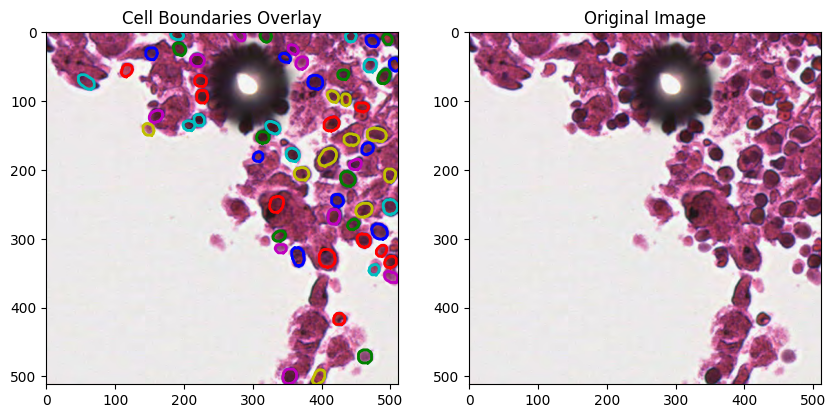

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.26595744..1.0].


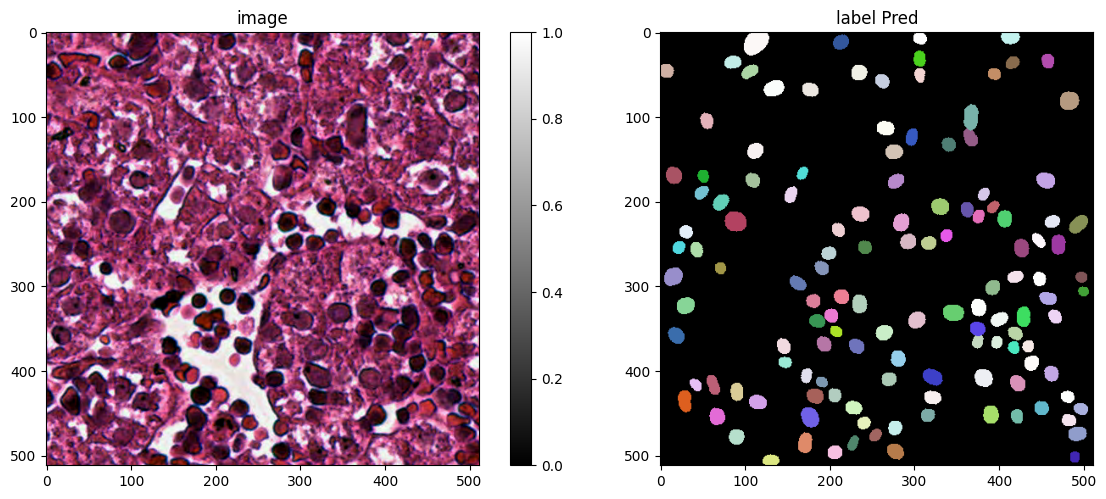

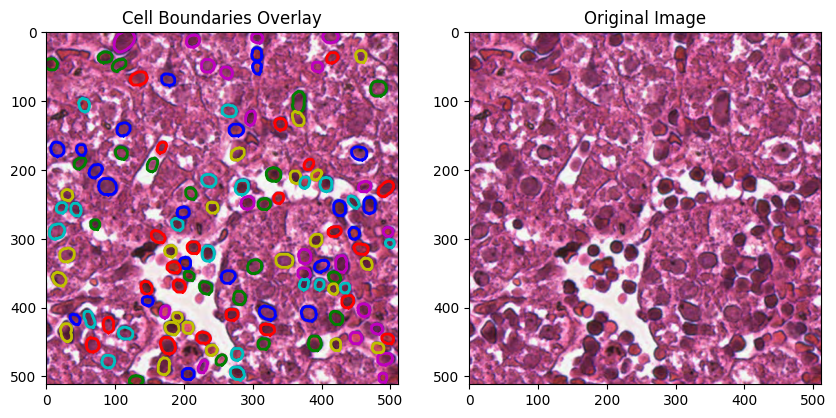

In [55]:
counter = 0

for new_image in all_new_images[:2]:
    save_npy_corrds_f = save_coords_folder / (new_image.stem + '_coords.npy')
    plot_overlay_save = None
    if counter < 10:
        plot_overlay_save = save_debug_image_folder / (new_image.stem + '_overlay.png')

    cp_model.predict_new_image(
        new_image, model, save_npy_corrds_f, 
        plot_overlay_save=plot_overlay_save,
        
    )
    
    counter += 1
    